In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

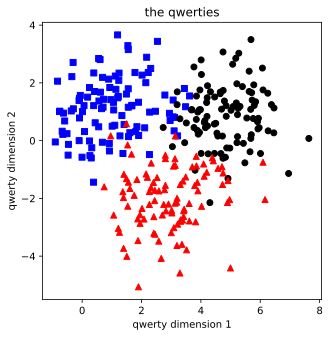

In [2]:
nPerClust=100
blur=1

A=[1,1]
B=[5,1]
C=[3,-2]
a=[A[0]+np.random.randn(nPerClust)*blur,A[1]+np.random.randn(nPerClust)*blur ]
b=[B[0]+np.random.randn(nPerClust)*blur,B[1]+np.random.randn(nPerClust)*blur ]
c=[C[0]+np.random.randn(nPerClust)*blur,C[1]+np.random.randn(nPerClust)*blur ]

labels_np=np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1)), 1+np.ones((nPerClust,1))))
data_np=np.hstack((a,b,c)).T
data=torch.tensor(data_np).float()
labels=torch.squeeze(torch.tensor(labels_np).long())
fig=plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1],'r^')

plt.title("the qwerties")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [3]:
ANNq=nn.Sequential(nn.Linear(2,4),
                     nn.ReLU(),
                     nn.Linear(4,3),
                    nn.Softmax(dim=1),
                     )
lossfun=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(ANNq.parameters(),lr=0.01)

In [4]:
numepoches=10000
losses=torch.zeros(numepoches)
ongoingacc=[]
for epochi in range(numepoches):
    yHAt=ANNq(data)
    
    loss=lossfun(yHAt,labels)
    losses[epochi]=loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches=torch.argmax(yHAt,axis=1)==labels
    matchesNumeric=matches.float()
    accpct=100*torch.mean(matchesNumeric)
    ongoingacc.append(accpct)
predictions=ANNq(data)
predlabels=torch.argmax(predictions,axis=1)
totalacc=100*torch.mean((predlabels==labels).float())
print(f'total accuracy is {totalacc}')

total accuracy is 93.0


Final accuracy: 93%


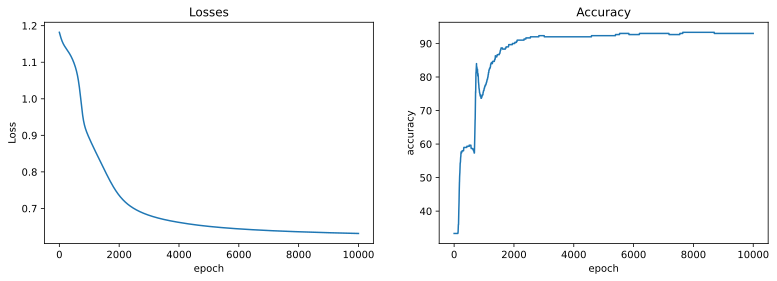

In [5]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingacc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [6]:
torch.sum(yHAt,axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

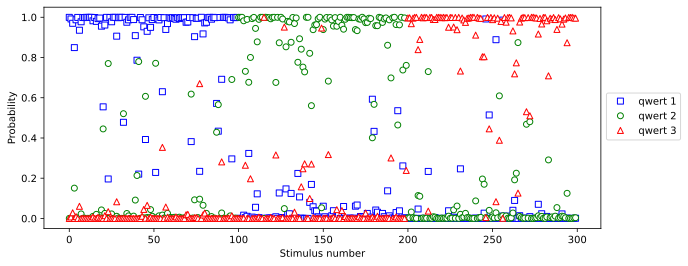

In [7]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = ['bs','go','r^']
for i in range(3):
      plt.plot(yHAt[:,i].detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1','qwert 2','qwert 3'],loc=(1.01,.4))
plt.show()